$$\require{mhchem}$$      


In [1]:
import pip
pip.main(['install', '-U', 'pycse==1.6.3'])
pip.main(['install', '-U', 'uncertainties'])
pip.main(['install', '-U', 'quantities'])


Requirement already up-to-date: pycse==1.6.3 in /opt/conda/lib/python3.6/site-packages
  Found existing installation: quantities 0.12.1
    Uninstalling quantities-0.12.1:
      Successfully uninstalled quantities-0.12.1
Requirement already up-to-date: uncertainties in /opt/conda/lib/python3.6/site-packages
Requirement already up-to-date: quantities in /opt/conda/lib/python3.6/site-packages


Exception:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.6/site-packages/pip/basecommand.py", line 215, in main
    status = self.run(options, args)
  File "/opt/conda/lib/python3.6/site-packages/pip/commands/install.py", line 335, in run
    wb.build(autobuilding=True)
  File "/opt/conda/lib/python3.6/site-packages/pip/wheel.py", line 749, in build
    self.requirement_set.prepare_files(self.finder)
  File "/opt/conda/lib/python3.6/site-packages/pip/req/req_set.py", line 380, in prepare_files
    ignore_dependencies=self.ignore_dependencies))
  File "/opt/conda/lib/python3.6/site-packages/pip/req/req_set.py", line 666, in _prepare_file
    check_dist_requires_python(dist)
  File "/opt/conda/lib/python3.6/site-packages/pip/utils/packaging.py", line 48, in check_dist_requires_python
    feed_parser.feed(metadata)
  File "/opt/conda/lib/python3.6/email/feedparser.py", line 175, in feed
    self._input.push(data)
  File "/opt/conda/lib/python3.6/email/feedparser.py", l

2

# Exam 1 Problem 1 (60 pts)

 We have a liquid feed of A and B, with concentration of A 2M and concentration of B 3M, with a total flow rate of 0.1 m$^3$/s.  We are looking to optimize the conversion of the reaction: 
\begin{align*}
\ce{A + 2B -> C}
\end{align*}
You can assume in all cases the reaction is isothermal and the volume does not change with changes in the molar flow rates of the reactants.  The reaction is elementary and the rate constant is $k_1=0.1 dm^6/mol^2/s$



## First, find the maximum extent of reaction $\xi^{max}$ and write the rate equation $r$. (5 pts)

$\alpha A = -1,$ 
$\alpha B = -2$

Ca0 = 2M

Cb0 = 3M

$\xi^{max}$ = - Ca0/ $\alpha A $ = -2/-1 = 2 M


$\xi^{max}$ = - Cb0/ $\alpha A $ = -3/-2 = 1.5 M

We pick the smaller one as the larger one would give us negative concentration values.

Hence $\xi^{max}$ = 1.5 M

r =  $k1 .Ca(Cb)^2$


$r = 0.1 Ca(Cb)^2$ $(mol/(dm^3.s))$

# Now, find the extent of reaction for a steady state 100 L CSTR with the feed and flow rate from above. (10 pts)
<img src="E1P1B.png" alt="Drawing" style="width: 300px;"/>


In [54]:
from scipy.optimize import fsolve

k1 = 0.1 #dm^6/mol^2/s
V = 100 #l
v0 = 100 #l^3.s
Ca0 = 2 #M
Cb0 = 3 #M
Cc0 = 0 #M

Fa0 = Ca0 * v0
Fb0 = Cb0 * v0
Fc0 = Cc0 * v0

def CSTR(F):
    Fa,Fb = F
    
    Ca = Fa / v0
    Cb = Fb / v0
    #Cc = Fc/ v0
    
    r = k1 * Ca * Cb**2
    
    ra = -1 * r
    rb = -2 * r
    #rc = r
    
    a = Fa0 - v0* Ca + ra*V
    b= Fb0 - v0*Cb + rb*V
    #dFcdt = Fc0 - Fc + rc*V
    
    return a,b

an = fsolve(CSTR,[100,100])
print (an)

Faexit = an[0]
Fbexit = an[1]

X = (Faexit-Fa0)/-1
eta = X/V

print ("The extent is ",X,"moles/sec and the intrinsic extent is",eta,"moles/lit/s")

[ 146.07168524  192.14337048]
The extent is  53.9283147615 moles/sec and the intrinsic extent is 0.539283147615 moles/lit/s


In [100]:
from scipy.optimize import fsolve

k1 = 0.1 #dm^6/mol^2/s
V = 100 #l
v0 = 100 #l^3.s
Ca0 = 2 #M
Cb0 = 3 #M
Cc0 = 0 #M

Fa0 = Ca0 * v0
Fb0 = Cb0 * v0
Fc0 = Cc0 * v0

def CSTR(eta):

    r = k1 * Ca0*(1-eta) * (Cb0*(1-2*eta))**2
    
    ra = -1 * r
   
    a = Fa0 - v0* Ca0*(1-eta) + ra*V
    
    return a

an = fsolve(CSTR,0.5)
print (an)


[ 0.22005157]


## Find the final extent of reaction for a 100 L PFR (10 pts)
<img src="E1P1C.png" alt="Drawing" style="width: 300px;"/>


In [48]:
from scipy.integrate import odeint
import numpy as np

k1 = 0.1 #dm^6/mol^2/s
V = 100 #l
v0 = 100 #l^3.s
Ca0 = 2 #M
Cb0 = 3 #M
Cc0 = 0 #M

Fa0 = Ca0 * v0
Fb0 = Cb0 * v0
Fc0 = Cc0 * v0
F0 = [Fa0,Fb0,Fc0]

def PFR(F,V):
    Fa,Fb,Fc = F
    
    Ca = Fa / v0
    Cb = Fb / v0
    Cc = Fc/ v0
    
    r = k1 * Ca * Cb**2
    
    ra = -1 * r
    rb = -2 * r
    rc = r
    
    dFadV = ra
    dFbdV = rb
    dFcdV = rc
    
    return dFadV,dFbdV,dFcdV

Vspan = np.linspace(0,100)

a = odeint(PFR,F0,Vspan)
#print (a)
Faexit = a[-1,0] 
Fbexit = a[-1,1] 
Fcexit = a[-1,2] 


X =  (Faexit-Fa0)/-1
eta = X/v0

print ("The final extent of reaction is",X, " moles/s and the final intrinsic extent is ",eta,"moles/lit/s") 

The final extent of reaction is 71.9835030533  moles/s and the final intrinsic extent is  0.719835030533 moles/lit/s


## Our operators tell us that they really like working with CSTR's and suggest that you use several CSTR's in series.  The total volume of CSTR's should equal 100 L.  For example, if you have 4 CSTR's, then  each will have a volume of 25 L.  The outflow of each CSTR is the same as the inflow to the next CSTR.  The extent of reaction for each reactor can be solved based on the extent of reaction from the previous reactor (sequentially).  Calculate the extent of reaction for the four reactor situation. (20 pts)
<img src="E1P1D.png" alt="Drawing" style="width: 500px;"/>


Faexit: 173.524 Fbexit: 247.047 reactor number: 1
Faexit: 163.802 Fbexit: 154.080 reactor number: 2
Faexit: 155.405 Fbexit: 147.009 reactor number: 3
Faexit: 148.073 Fbexit: 140.740 reactor number: 4
final conversion is 0.519271719527


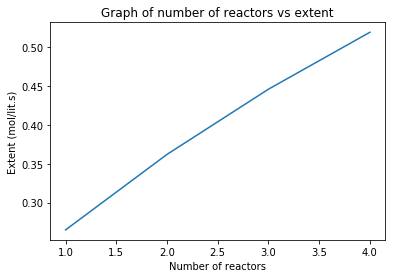

In [119]:
from scipy.optimize import fsolve

k1 = 0.1 #dm^6/mol^2/s
V = 100 #l
v0 = 100 #l^3.s

Ca0 = 2 #M
Cb0 = 3 #M
Cc0 = 0 #M

Fa0 = Ca0 * v0
Fb0 = Cb0 * v0
Fc0 = Cc0 * v0
ETA = []
for i in range (0,4):
    

    Fain = Ca0 * v0
    Fbin = Cb0 * v0
    #Fc0 = Cc0 * v0

    def CSTR(F):
        Fa,Fb = F

        Ca = Fa / v0
        Cb = Fb / v0
        #Cc = Fc/ v0

        r = k1 * Ca * Cb**2

        ra = -1 * r
        rb = -2 * r
        #rc = r

        a = Fain - v0* Ca + ra*(V/4)
        b= Fbin - v0*Cb + rb*(V/4)
        #dFcdt = Fc0 - Fc + rc*V

        return a,b

    an = fsolve(CSTR,[100,100])
    

    Faexit = an[0]
    Fbexit = an[1]
    print ("Faexit: {0:1.3f}".format(Faexit),"Fbexit: {0:1.3f}".format(Fbexit),"reactor number:", i+1)
    
    Caexit = Faexit / v0
    Cbexit = Faexit / v0
    
    Ca0 = Caexit
    Cb0 = Cbexit
    X = (Faexit-Fa0)/-1
    eta = X/V
    ETA.append(eta)
    #print ("The extent is ",X,"moles/sec and the intrinsic extent is",eta,"moles/lit/s \n")

#print(ETA)
Reactors = np.linspace(1,4,4)
#print (Reactors)


print ("final conversion is",ETA[-1])
import matplotlib.pyplot as plt
plt.plot(Reactors,ETA)
plt.xlabel("Number of reactors")
plt.ylabel("Extent (mol/lit.s)")
plt.title("Graph of number of reactors vs extent")
plt.show()

## Plot the final extent of reaction for this approach from 1 to 10 reactors, and compare to the conversions from the CSTR and PFR examples above. (9 pts)

Faexit: 186.187 Fbexit: 272.374 reactor number: 1
Faexit: 180.648 Fbexit: 175.109 reactor number: 2
Faexit: 175.548 Fbexit: 170.448 reactor number: 3
Faexit: 170.834 Fbexit: 166.119 reactor number: 4
Faexit: 166.460 Fbexit: 162.087 reactor number: 5
Faexit: 162.390 Fbexit: 158.320 reactor number: 6
Faexit: 158.590 Fbexit: 154.790 reactor number: 7
Faexit: 155.033 Fbexit: 151.476 reactor number: 8
Faexit: 151.694 Fbexit: 148.356 reactor number: 9
Faexit: 148.553 Fbexit: 145.412 reactor number: 10
[0.13812816695627589, 0.19352037993712826, 0.24452132468611665, 0.29166394508273752, 0.33539675108370742, 0.37609999883204609, 0.41409828376563068, 0.44967044032852471, 0.48305739676914927, 0.51446846132173729]
[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]


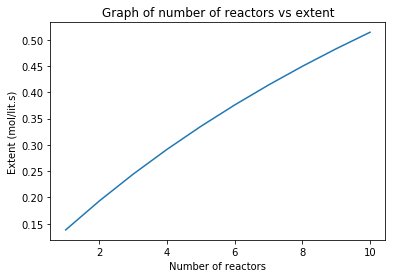

In [95]:
from scipy.optimize import fsolve

k1 = 0.1 #dm^6/mol^2/s
V = 100 #l
v0 = 100 #l^3.s

Ca0 = 2 #M
Cb0 = 3 #M
Cc0 = 0 #M

Fa0 = Ca0 * v0
Fb0 = Cb0 * v0
Fc0 = Cc0 * v0
ETA = []
for i in range (0,10):
    

    Fain = Ca0 * v0
    Fbin = Cb0 * v0
    #Fc0 = Cc0 * v0

    def CSTR(F):
        Fa,Fb = F

        Ca = Fa / v0
        Cb = Fb / v0
        #Cc = Fc/ v0

        r = k1 * Ca * Cb**2

        ra = -1 * r
        rb = -2 * r
        #rc = r

        a = Fain - v0* Ca + ra*(V/10)
        b= Fbin - v0*Cb + rb*(V/10)
        #dFcdt = Fc0 - Fc + rc*V

        return a,b

    an = fsolve(CSTR,[100,100])
    

    Faexit = an[0]
    Fbexit = an[1]
    print ("Faexit: {0:1.3f}".format(Faexit),"Fbexit: {0:1.3f}".format(Fbexit),"reactor number:", i+1)
    
    Caexit = Faexit / v0
    Cbexit = Faexit / v0
    
    Ca0 = Caexit
    Cb0 = Cbexit
    X = (Faexit-Fa0)/-1
    eta = X/V
    ETA.append(eta)
    #print ("The extent is ",X,"moles/sec and the intrinsic extent is",eta,"moles/lit/s \n")

print(ETA)
Reactors = np.linspace(1,10,10)
print (Reactors)

import matplotlib.pyplot as plt
plt.plot(Reactors,ETA)
plt.xlabel("Number of reactors")
plt.ylabel("Extent (mol/lit.s)")
plt.title("Graph of number of reactors vs extent")
plt.show()


As we increase the number of reactors, the conversion of the system of CSTRs approaches the conversion of an equivalent PFR with the same total volume.

## We are considering adding a membrane to the PFR.  We have a few options.  For each, answer qualitatively if you think the conversion of A would increase, decrease, or stay the same, and why: (2 pts each)
- A membrane that allows A to be added slowly through the side of the PFR (w/ pure B inlet), total molar flow rate of A & B the same
- A membrane that allows B to be added slowly through the side of the PFR (w/ pure A inlet), total molar flow rate of A & B the same
- A membrane that allows C to be removed continuously through the side of the PDF

Case 1) Conversion would decrease as the time for which A and B are allowed to interact would decrease. It increases selectivity at the cost of conversion.

Case 2) Conversion would decrease as the time for which A and B are allowed to interact would decrease. It increases selectivity at the cost of conversion

Case 3) If C is removed, the equillibrium is pushed toward the right and hence conversion would increase

# Exam 1 Problem 2 (40 pts)

We are looking to design a liquid phase membrane PFR (V=10L) with three channels for the rection system:
\begin{align}
\ce{A + B -> 4C}, k_1=0.1/M/s\\
\ce{A + C -> 3D}, k_2=0.5/M/s
\end{align}
The inner channel contains a feed of pure A with a concentration of 1M and flow rate of 2 L/s. A is very large and cannot pass any membrane. B,C,D can pass the first membrane ($k_{b,1}'=0.2/s,k_{c,1}'=0.4/s,k_{d,1}'=0.5/s$) between the inner and outer sections.  C,D are very small and can also pass the outer membrane ($k_{c,2}'=0.5/s,k_{d,2}'=0.7/s$) between the middle and outer sections. You may assume the volumetric flow rates are constant.  The middle-channel is counter-current (flowing opposite to the inner and outer shells).
![img](./E1P2.png)


## Write the mol balance for each of the 9 species (A,B,C,D in inner, B,C,D in middle, C,D in outer), as well as the boundary conditions on the left side of the reactor (i.e. inlet of inner shell).  (20 pts)

## Solve for and plot the concentration profiles for each species along the length of the reactor. (20 pts)